In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from sklearn.preprocessing import StandardScaler, KernelCenterer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.utils import extmath
from scipy.stats import f
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

In [2]:
# The Datas
data = pd.read_csv('plums.csv')
X = data.values[:,1:]
Xstd = StandardScaler().fit_transform(X)

In [3]:
def ker_pca(X, n_components=3, gamma = 0.01):
    
    # Calculate euclidean distances of each pair of points in the data set
    dist = euclidean_distances(X, X, squared=True)
    
    # Calculate Gaussian kernel matrix
    K = np.exp(-gamma * dist)
    Kc = KernelCenterer().fit_transform(K)
    
    # Get eigenvalues and eigenvectors of the kernel matrix
    eig_vals, eig_vecs = np.linalg.eigh(Kc)
    
    # flip eigenvectors' sign to enforce deterministic output
    eig_vecs, _ = extmath.svd_flip(eig_vecs, np.empty_like(eig_vecs).T)
    
    # Concatenate the eigenvectors corresponding to the highest n_components eigenvalues
    Xkpca = np.column_stack([eig_vecs[:,-i] for i in range(1,n_components+1)])
 
    return Xkpca

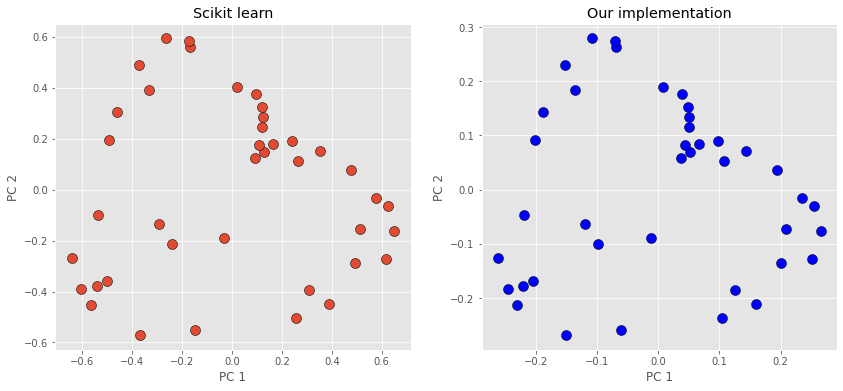

In [4]:
kpca1 = KernelPCA(n_components=3, kernel='rbf', gamma=0.01)
Xkpca1 = kpca1.fit_transform(Xstd)
 
Xkpca2 = ker_pca(Xstd)
 
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
 
    #plt.figure(figsize=(8,6))
    ax[0].scatter(Xkpca1[:,0], Xkpca1[:,1], s=100, edgecolors='k')   
    ax[0].set_xlabel('PC 1')
    ax[0].set_ylabel('PC 2')
    ax[0].set_title('Scikit learn')
    
    ax[1].scatter(Xkpca2[:,0], Xkpca2[:,1], s=100, facecolor = 'b', edgecolors='k')
    ax[1].set_xlabel('PC 1')
    ax[1].set_ylabel('PC 2')
    ax[1].set_title('Our implementation')
    plt.show()

# Let's Apply the TEP Dataset

In [5]:
train_normal = pd.read_csv('./data/normal_training.csv')

In [6]:
test_faulty = pd.read_csv('./data/faulty_testing.csv')

In [7]:
df_train = train_normal[(train_normal.simulationRun>=1)].iloc[:500,3:]

In [8]:
IDV = 1
df_test = test_faulty[(test_faulty.faultNumber==IDV) & 
                               (test_faulty.simulationRun==1)].iloc[:,3:]

In [9]:
std_scl = StandardScaler().fit(df_train)
dtrn_scl = std_scl.transform(df_train)
dtrn_scl = pd.DataFrame(dtrn_scl)

In [10]:
dtrn_scl = dtrn_scl.values

In [11]:
dtrn_scl.shape

(500, 52)

In [12]:
std_scl = StandardScaler().fit(df_test)
dtst_scl = std_scl.transform(df_test)
dtst_scl = pd.DataFrame(dtst_scl)

### Train

In [29]:
gamma = 0.01
n_comp = 16
conf_T2 = 0.95
nSamples = 500

In [13]:
# Calculate euclidean distances of each pair of points in the data set
dist = euclidean_distances(dtrn_scl, dtrn_scl, squared=True)

In [37]:
dist.shape

(500, 500)

In [15]:
# Calculate Gaussian kernel matrix
K = np.exp(-gamma * dist)
Kc = KernelCenterer().fit_transform(K)

In [16]:
# Get eigenvalues and eigenvectors of the kernel matrix
eig_vals, eig_vecs = np.linalg.eigh(Kc)

In [21]:
eig_vals = pd.DataFrame(eig_vals)
eig_vecs = pd.DataFrame(eig_vecs)

In [17]:
eig_vals.shape

(500,)

In [19]:
eig_vecs.shape

(500, 500)

In [24]:
# get the score matrix
score_train = Kc@eig_vecs.iloc[:,:n_comp]

In [26]:
### T2 Process ###
a = eig_vals.iloc[:n_comp,:]
z = a.values.tolist()
extract_egv=[]
for i in range(len(z)):
    extract_egv.append(z[i][0])
## extracted eigen value
c = np.diag(extract_egv)
## eigen value with linear diagonal value
invegvldiag = c

In [27]:
### T2 Score ###
T2_train = score_train@invegvldiag@score_train.T
T2_tfinal = np.diag(T2_train)

In [28]:
T2_tfinal

array([9.71037800e-06, 1.78081108e-05, 1.91242739e-05, 1.07693525e-05,
       2.26205809e-06, 4.56145652e-07, 7.09350842e-06, 3.78008491e-06,
       1.56044916e-07, 1.19602359e-07, 4.01380024e-07, 4.46524492e-07,
       2.40125349e-07, 3.86456764e-07, 1.21743371e-07, 1.84936978e-08,
       9.32876375e-07, 6.45697811e-07, 2.71498107e-06, 1.02604039e-06,
       3.97716804e-07, 4.72828137e-07, 3.30404799e-07, 5.39399803e-07,
       8.24881799e-07, 3.82423144e-07, 1.27480228e-06, 9.32171118e-07,
       9.50400275e-06, 1.42199333e-05, 2.63876161e-07, 1.23461078e-07,
       4.67670475e-07, 7.19302618e-07, 1.52799701e-07, 6.32374289e-08,
       3.42691212e-07, 3.01693659e-07, 3.33708143e-07, 3.33232491e-07,
       2.11399969e-07, 1.90638827e-07, 2.70502883e-07, 1.16627597e-07,
       7.81111958e-08, 9.37324754e-08, 7.73724315e-08, 2.24198894e-07,
       2.91911562e-06, 1.89406615e-06, 4.57778426e-07, 1.92363441e-07,
       6.33111823e-07, 4.86402925e-07, 1.58765230e-07, 1.58010025e-07,
      

In [32]:
### Tlim ###
F = f.ppf(conf_T2, n_comp, nSamples-n_comp)
T2_trlim = ((n_comp*(nSamples**2-1))/(nSamples*(nSamples-n_comp)))*F

In [33]:
T2_trlim

27.511202863723632

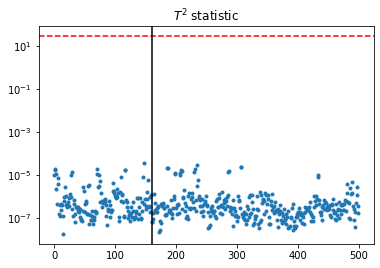

T2: 0.0


In [35]:
plt.figure(figsize=(6,4))
plt.semilogy(T2_tfinal,'.')
plt.axhline(T2_trlim, ls='--',c='r')
plt.axvline(160, c='k')
plt.title('$T^2$ statistic')
plt.show()
## print the T2 score
print(f'T2: {(T2_tfinal>T2_trlim).sum()/T2_tfinal.shape[0]}')

### Test

In [38]:
# Calculate euclidean distances of each pair of points in the data set
dist = euclidean_distances(dtst_scl, dtrn_scl, squared=True)

In [40]:
# Calculate Gaussian kernel matrix
K = np.exp(-gamma * dist)

In [41]:
K.shape

(960, 500)

In [42]:
Kc = KernelCenterer().fit_transform(K)

ValueError: Kernel matrix must be a square matrix. Input is a 960x500 matrix.